# Final Problem Set for Physics 5300 


## Gravitational Orbits in Cartesian Coordinates

Solves the two body problem for gravitational attraction between two bodies in Cartesian Coordinates. 

* Last revised 16-Apr-2019 by Ness Mayker (mayker.1@osu.edu).


## Kinetic Energy

For a two body gravitationally bound system, the kinetic energy (T) is

$\begin{align}
  T = \frac12 m_1(\dot x_1^2+\dot y_1^2)+\frac12 m_2(\dot x_2^2+\dot y_2^2)
\end{align}$

## Potential Energy

The potential energy (U) is

$\begin{align}
  U(r) = \frac{-Gm_1m_2}{r}          
\end{align}$

  where $r = ((x_2-x_1)^2+(y_2-y_1)^2)^\frac12$


## Lagrangian

For a two-body, gravitationally-bound system, the Lagrangian in cartesian coordinates is:

$\begin{align}
  \mathcal{L} = \frac12 m_1(\dot x_1^2+\dot y_1^2)+\frac12 m_2(\dot x_2^2+\dot y_2^2)+\frac{Gm_1m_2}{((x_2-x_1)^2+(y_2-y_1)^2)^{1/2}}
\end{align}$

## Euler-Lagrange equations

The Euler-Lagrange equations are

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_1} = \frac{\partial\mathcal L}{\partial x_1}
 \quad\Longrightarrow\quad
 m_1\ddot x_1 = \frac{-Gm_1m_2(x_1-x_2)}{((x_2-x_1)^2+(y_2-y_1)^2)^{3/2}}
  \;.
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_2} = \frac{\partial\mathcal L}{\partial x_2}
 \quad\Longrightarrow\quad
 m_2\ddot x_2 = \frac{-Gm_1m_2(x_2-x_1)}{((x_2-x_1)^2+(y_2-y_1)^2)^{3/2}}
  \;.
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_1} = \frac{\partial\mathcal L}{\partial y_1}
 \quad\Longrightarrow\quad
 m_1\ddot y_1 = \frac{-Gm_1m_2(y_1-y_2)}{((x_2-x_1)^2+(y_2-y_1)^2)^{3/2}}
  \;.
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_2} = \frac{\partial\mathcal L}{\partial y_2}
 \quad\Longrightarrow\quad
 m_2\ddot y_2 = \frac{-Gm_1m_2(y_2-y_1)}{((x_2-x_1)^2+(y_2-y_1)^2)^{3/2}}
  \;.
\end{align}$

The equations of motion are

$\begin{align}
 \ddot x_1 = \frac{-Gm_2(x_1-x_2)}{((x_2-x_1)^2+(y_2-y_1)^2)^{3/2}}
  \;.
\end{align}$

$\begin{align}
 \ddot x_2 = \frac{-Gm_1(x_2-x_1)}{((x_2-x_1)^2+(y_2-y_1)^2)^{3/2}}
  \;.
\end{align}$

$\begin{align}
 \ddot y_1 = \frac{-Gm_2(y_1-y_2)}{((x_2-x_1)^2+(y_2-y_1)^2)^{3/2}}
  \;.
\end{align}$

$\begin{align}
 \ddot y_2 = \frac{-Gm_1(y_2-y_1)}{((x_2-x_1)^2+(y_2-y_1)^2)^{3/2}}
  \;.
\end{align}$

In [1]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

### Orbit Class & Utility Functions

In [2]:
class Orbit():
    """
    Orbit class implements the parameters and Lagrangian equations for 
     a two body gravitational orbit.

    Parameters
    ----------

    m1 : float
        mass of first body
    m2 : float
        mass of second body
    G : float
        gravitational constant

    Methods
    -------
    dz_dt(t, z)
        Returns the right side of the differential equation in vector z, 
        given time t and the corresponding value of z.
    """
    def __init__(self, m1=1., m2=10., G=1.,
                ):
        self.m1 = m1
        self.m2 = m2
        self.G  = G
    
    def dz_dt(self, t, z):
        """
        Parameters
        ----------
        t : float
            time 
        z : float
            An 8-component vector with 
            z[0] = x_1(t), z[1] = dx_1/dt, z[2] = x_2(t), z[3] = dx_2/dt, 
            z[4] = y_1(t), z[5] = dy_1/dt, z[6] = y_2(t), z[7] = dy_2/dt,            
        Returns the right-hand side of the diffeq: 
        [dx_1/dt, dx_1^2/dt^2, dx_2/dt, dx_2^2/dt^2, dy_1/dt, dy_1^2/dt^2, dy_2/dt, dy_2^2/dt^2]
        -------
        """
        x1    = z[0]
        x2    = z[2]
        y1    = z[4]
        y2    = z[6]
        x1dot = z[1]
        x2dot = z[3]
        y1dot = z[5]
        y2dot = z[7]
        m1 = self.m1 
        m2 = self.m2 
        G  = self.G
        
        r = np.sqrt((x2-x1)**2 + (y2-y1)**2)
                   
        x1ddot = -G * m2 * (x1-x2) / r**(3)
        x2ddot = -G * m1 * (x2-x1) / r**(3)
        y1ddot = -G * m2 * (y1-y2) / r**(3)
        y2ddot = -G * m1 * (y2-y1) / r**(3)
        
        return [z[1], x1ddot, z[3], x2ddot, z[5], y1ddot, z[7], y2ddot]
    
    def solve_ode(self, t_pts, x1_0, x1dot_0, x2_0, x2dot_0, y1_0, y1dot_0, y2_0, y2dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE using solve_ivp given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        z = [x1_0, x1dot_0, x2_0, x2dot_0, y1_0, y1dot_0, y2_0, y2dot_0] 
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x1, x1dot, x2, x2dot, y1, y1dot, y2, y2dot  = solution.y

        return x1, x1dot, x2, x2dot, y1, y1dot, y2, y2dot

### Set up Generic Plotting Function

In [3]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [5]:
# Labels for individual plot axes
x_vs_y_labels = ('x', 'y')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

G  = 1.0
m1 = 1.0
m2 = 1.0

# Instantiate an orbit
o1 = Orbit(m1=m1, m2=m2, G=G)


# Gravitational orbits when both bodies have same mass, keeping the center of mass constant.

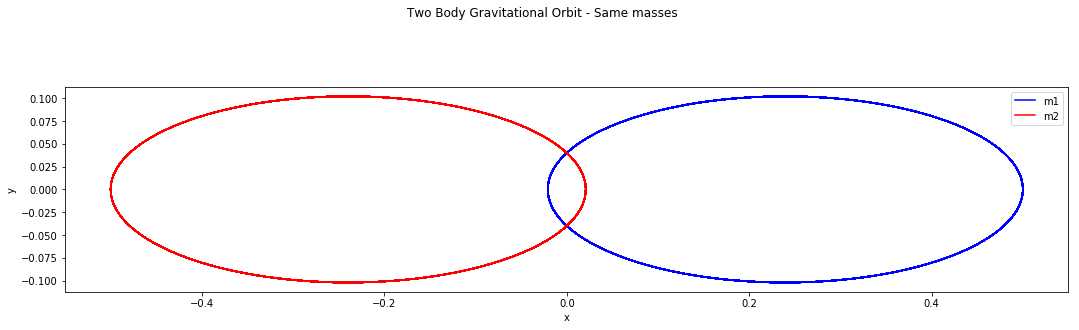

In [6]:
#specify initial condition of first body then calculate behavior of second that keeps CM constant.
x1_0 = 0.5 
y1_0 = 0.

x2_0 = -m1 / m2 * x1_0
y2_0 = -m1 / m2 * y1_0 

x1dot_0 = 0 
y1dot_0 = 0.2

x2dot_0 = -m1 / m2 * x1dot_0 
y2dot_0 = -m1 / m2 * y1dot_0

x1, x1dot, x2, x2dot, y1, y1dot, y2, y2dot = o1.solve_ode(t_pts, x1_0, x1dot_0, x2_0, x2dot_0, y1_0, y1dot_0, y2_0, y2dot_0)

# Plot the orbits
fig = plt.figure(figsize=(15,5))
ax_a = fig.add_subplot(1,1,1)
overall_title = 'Two Body Gravitational Orbit - Same masses'
fig.suptitle(overall_title, va='baseline')
    
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop],
            axis_labels=x_vs_y_labels, 
            color='blue',
            label='m1', 
            ax=ax_a)    
plot_y_vs_x(x2[start : stop], y2[start : stop],
            color='red',
            label='m2',
            ax=ax_a) 
ax_a.set_aspect(1) # shows ratio between x and y without resizing.

fig.tight_layout()
fig.savefig('orbit.png', bbox_inches='tight')  


## Now Show orbit with different starting conditions

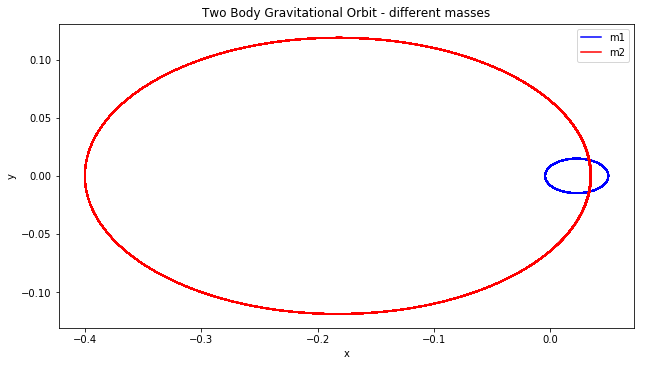

In [7]:

G  = 1.0
m1 = 8.0
m2 = 1.0

# Instantiate an orbit
o2 = Orbit(m1=m1, m2=m2, G=G)

x1_0 = 0.05 
y1_0 = 0.

x2_0 = -m1 / m2 * x1_0
y2_0 = -m1 / m2 * y1_0 

x1dot_0 = 0 
y1dot_0 = 0.2

x2dot_0 = -m1 / m2 * x1dot_0 
y2dot_0 = -m1 / m2 * y1dot_0

x1, x1dot, x2, x2dot, y1, y1dot, y2, y2dot = o2.solve_ode(t_pts, x1_0, x1dot_0, x2_0, x2dot_0, y1_0, y1dot_0, y2_0, y2dot_0)

# Plot the orbits
fig = plt.figure(figsize=(15,5))
ax_a = fig.add_subplot(1,1,1)
overall_title = 'Two Body Gravitational Orbit - different masses'
fig.suptitle(overall_title, va='baseline')
    
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop],
            axis_labels=x_vs_y_labels, 
            color='blue',
            label='m1', 
            ax=ax_a)    
plot_y_vs_x(x2[start : stop], y2[start : stop],
            color='red',
            label='m2',
            ax=ax_a) 
ax_a.set_aspect(1) # shows ratio between x and y without resizing.

fig.tight_layout()
fig.savefig('orbitDifInitCond.png', bbox_inches='tight')  